In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
#Load data
train_df = pd.read_csv("C:\\Users\\PUNEET SINGH\\winequality-red.csv")

In [3]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#### checking the null values of the dataset
train_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

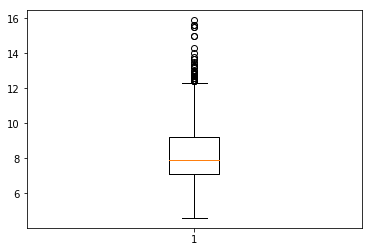

In [6]:
# checking the outliers in the data
plt.boxplot(train_df['fixed acidity'])
plt.show()

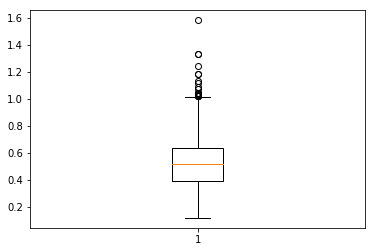

In [7]:
# checking the outliers in the data
plt.boxplot(train_df['volatile acidity'])
plt.show()

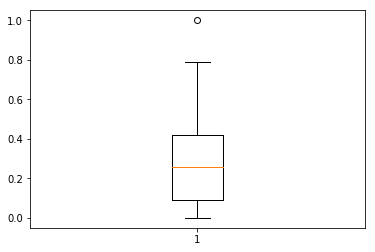

In [8]:
# checking the outliers in the data
plt.boxplot(train_df['citric acid'])
plt.show()

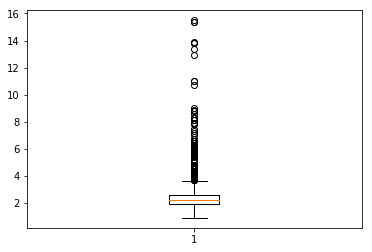

In [9]:
# checking the outliers in the data
plt.boxplot(train_df['residual sugar'])
plt.show()

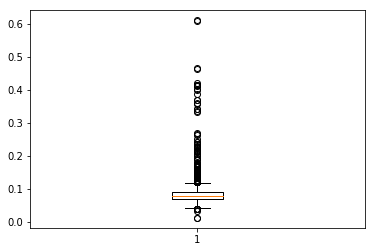

In [10]:
# checking the outliers in the data
plt.boxplot(train_df['chlorides'])
plt.show()

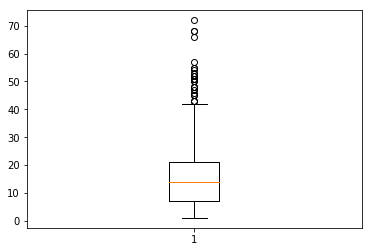

In [11]:
# checking the outliers in the data
plt.boxplot(train_df['free sulfur dioxide'])
plt.show()

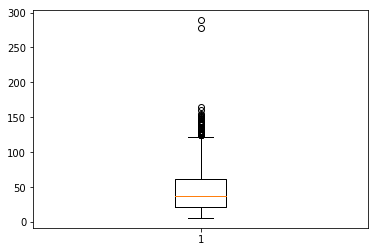

In [12]:
# checking the outliers in the data
plt.boxplot(train_df['total sulfur dioxide'])
plt.show()

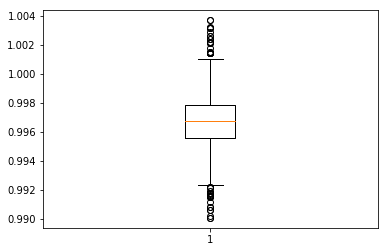

In [13]:
# checking the outliers in the data
plt.boxplot(train_df['density'])
plt.show()

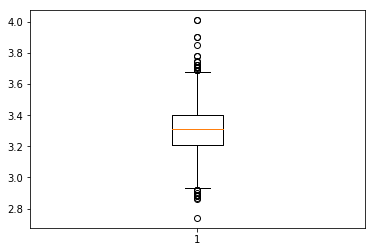

In [14]:
# checking the outliers in the data
plt.boxplot(train_df['pH'])
plt.show()

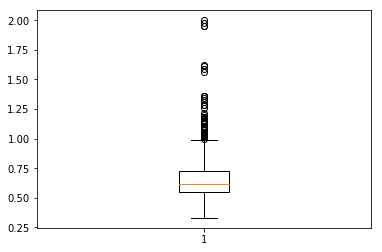

In [15]:
# checking the outliers in the data
plt.boxplot(train_df['sulphates'])
plt.show()

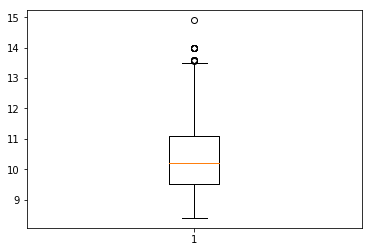

In [16]:
# checking the outliers in the data
plt.boxplot(train_df['alcohol'])
plt.show()

In [17]:
# checking the outliers through z score
# importing the library
from scipy.stats import zscore

In [18]:
z = np.abs(zscore(train_df.iloc[:,0:-1]))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 1.28864292, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.7199333 , 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.33117661, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.70550789, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.6773996 , 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.51112954, 0.01092425,
        0.54162988]])

In [19]:
threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [20]:
# removing the outliers of the data 
load_new = train_df[(z<3).all(axis=1)]
load_new.shape

(1458, 12)

In [21]:
# importing the library
import seaborn as sns

In [22]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


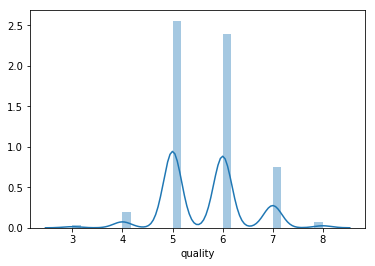

In [23]:
sns.distplot(train_df['quality'])
plt.show()   

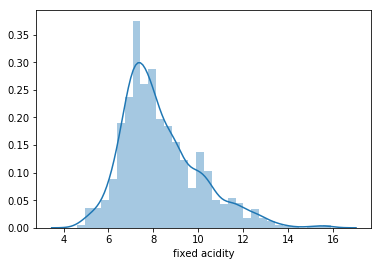

In [24]:
sns.distplot(train_df['fixed acidity'])
plt.show()   

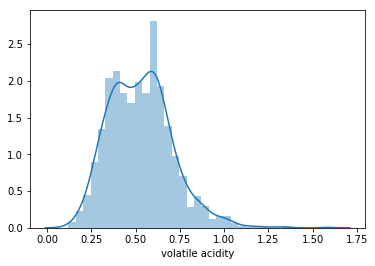

In [25]:
sns.distplot(train_df['volatile acidity'])
plt.show()   

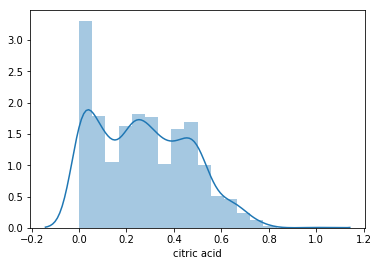

In [26]:
sns.distplot(train_df['citric acid'])
plt.show()   

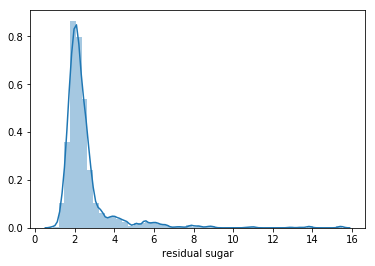

In [27]:
sns.distplot(train_df['residual sugar'])
plt.show()   

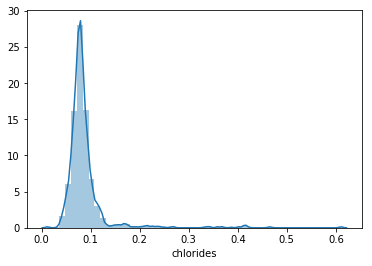

In [28]:
sns.distplot(train_df['chlorides'])
plt.show()   

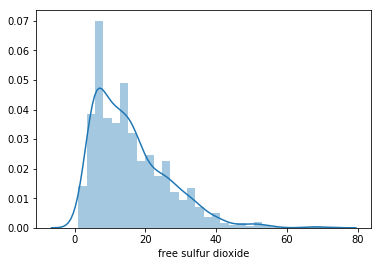

In [29]:
sns.distplot(train_df['free sulfur dioxide'])
plt.show()   

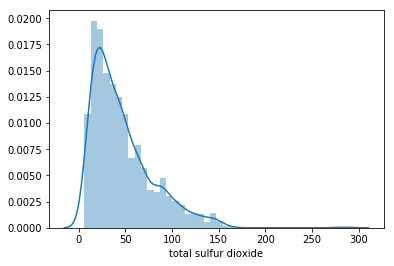

In [30]:
sns.distplot(train_df['total sulfur dioxide'])
plt.show()   

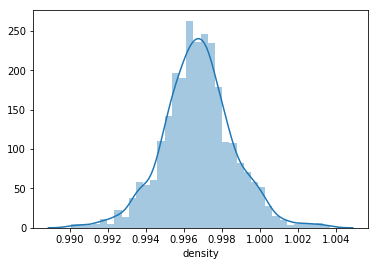

In [31]:
sns.distplot(train_df['density'])
plt.show()   

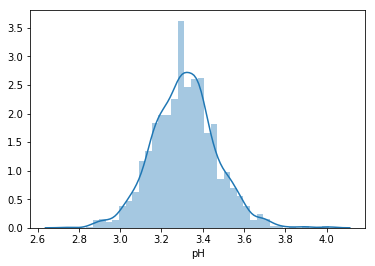

In [32]:
sns.distplot(train_df['pH'])
plt.show()   

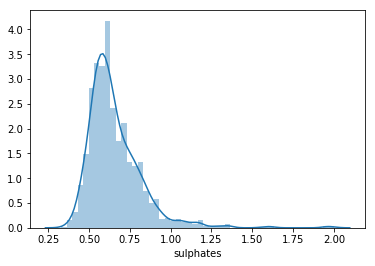

In [33]:
sns.distplot(train_df['sulphates'])
plt.show()   

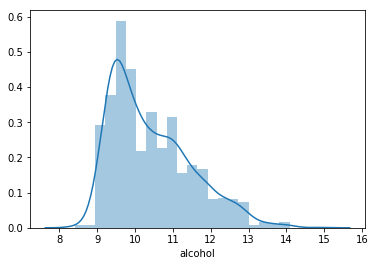

In [34]:
sns.distplot(train_df['alcohol'])
plt.show()   

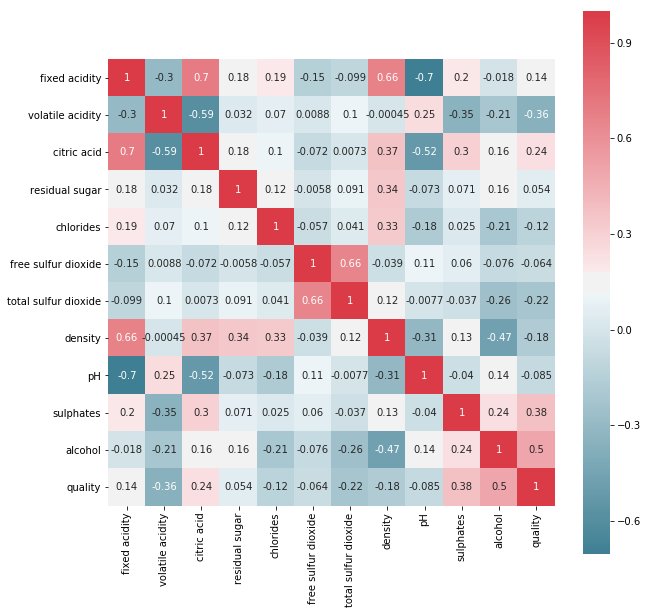

In [35]:
# finding the correlation between the continous variables
f,ax = plt.subplots(figsize=(10,10))
corr=load_new.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot = True)
plt.show()

In [36]:
load_new = load_new.drop(['fixed acidity'], axis=1)  #strong correlation between density and citric acid

In [37]:
load_new.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
#Import Libraries for decision tree

#Load Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
#Divide data into train and test
train, test = train_test_split(load_new, test_size=0.2)

In [40]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:10], train.iloc[:,10])

#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:10])


In [41]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,10], predictions_DT)

10.882051288099726

In [42]:
#Built Linear Regression
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,10], train.iloc[:,0:10]).fit()

In [43]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     9614.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:34:56   Log-Likelihood:                -1097.8
No. Observations:                1166   AIC:                             2216.
Df Residuals:                    1156   BIC:                             2266.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.0283      0.145     -7.087      0.000      -1.313      -0.744
citric acid             -0.3430      0.147     -2.331      0.020      -0.632      -0.054
residual sugar           0.0013      0.022      0.061      0.952      -0.042       0.044
chlorides               -0.6595      0.945     -0.698      0.485      -2.513       1.194
free sulfur dioxide      0.0051      0.003      1.884      0.060      -0.000       0.010
total sulfur dioxide    -0.0036      0.001     -3.969      0.000      -0.005      -0.002
density                  5.1838      0.563      9.213      0.000       4.080       6.288
pH                      -0.8186      0.160     -5.108      0.000      -1.133      -0.504
sulphates                1.3201      0.157      8.409      0.000       1.012       1.628
alcohol                  0.2978      0.021     14.379      0.000       0.257       0.338
==============================================================================
Omnibus:                       13.539   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.493
Skew:                          -0.147   Prob(JB):                     0.000159
Kurtosis:                       3.523   Cond. No.                     2.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:10]) 

In [45]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,10], predictions_LR)

9.56737966493268

In [46]:
#Random Forest
#Divide data into train and test
X = load_new.values[:, 0:10]
Y = load_new.values[:,10]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.38 degrees.


In [48]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [49]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.76 %.
